In [1]:
from fuzzycorr import fuzzy_correlation_factory
from fuzzycorr.strict_orderings import lukasiewicz_strict_ordering_factory
from fuzzycorr.t_norms import godel

In [281]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
import scipy.stats

In [313]:
N_OF_SAMPLES = 100
STD = [0, 0.00097, 0.0019, 0.0039, 0.0078, 0.0156, 0.031, 0.062, 0.125]

def f(x):
    if x >= 0.5:
        return x/2 + 1/4
    else:
        return x

x = np.sort(np.random.random(N_OF_SAMPLES))
y = np.array([f(a) for a in x])

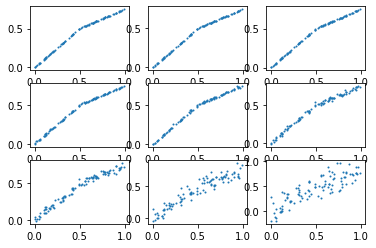

In [314]:
fig, axs = plt.subplots(3,3)
axs_ids = [[0,0],[0,1],[0,2],
            [1,0], [1,1], [1,2],
            [2, 0], [2,1], [2,2]]

y_noise_dataset = []

for idx, std in enumerate(STD):
    noise = np.random.normal(0, std, N_OF_SAMPLES)
    y_noise = y + noise

    y_noise_dataset.append(y_noise)

    axs_x, axs_y = axs_ids[idx]
    axs[axs_x, axs_y].scatter(x, y_noise, s=1)

plt.show()


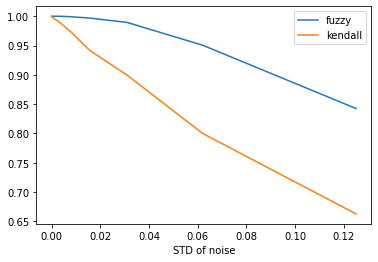

In [318]:
fuzzy_correlations = []
kendall_correlations = []

for std, y_noise in zip(STD, y_noise_dataset):
    fuzzy = fuzzy_correlation_factory(lukasiewicz_strict_ordering_factory(r=0.2), godel)(x, y_noise)
    fuzzy_correlations.append(fuzzy)
    kendall_correlations.append(scipy.stats.kendalltau(x, y_noise)[0])

plt.xlabel('corr')
plt.xlabel('STD of noise')
plt.plot(STD, fuzz, STD, kendall)
plt.legend(['fuzzy', 'kendall'])